# Predicting Heart Disease

Using various python tools to build a ML model to predict whether a person has heart disease or not.

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Prediciting if a patient has heart disease or not on basis of their report

## 2. Data

kaggle dataset: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?select=heart_disease_uci.csv

## 3. Evaluation

Need a high accuracy model (95%+)

## 4. Features

**Data Dictionary**

Column Descriptions:

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type 
    * ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
    * -- Values: [normal, stt abnormality, lv hypertrophy]
10. thalach: maximum heart rate achieved
11. exang: exercise-induced angina 
    * (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels 
    *(0-3) colored by fluoroscopy
15. thal: 
    * [normal; fixed defect; reversible defect]
16. num: the predicted attribute

## Preparing the Tools

In [1]:
# Importing all the tools needed

# Regulatory EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Models from sci-kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
df= pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Data Exploration

Become expert and get familiar with the data

1. What type of questions you are trying to solve?
2. What kind of data we have and how we treat different types
3. Dealing with missing data
4. Dealing with outliers (samples which are far away from others)
5. How to add change and remove features to get more out of the data

In [4]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

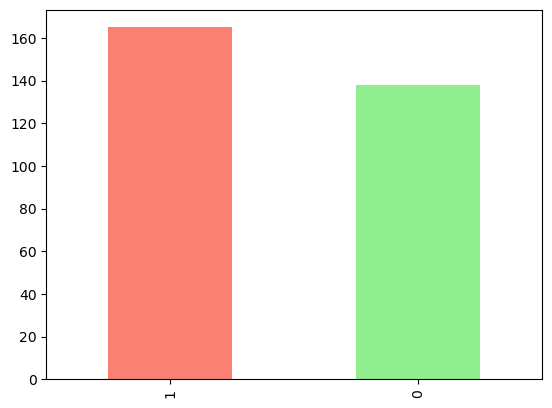

In [5]:
df['target'].value_counts().plot(kind='bar',color=['salmon', 'lightgreen']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing columns

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df['sex'], df['target'], rownames=['gender'],colnames=['outcome'])

outcome,0,1
gender,,
0,24,72
1,114,93


we can infer that more percentage of women has heart disease compared to men

> try to make graphs as visual representation with proper label so that we can share

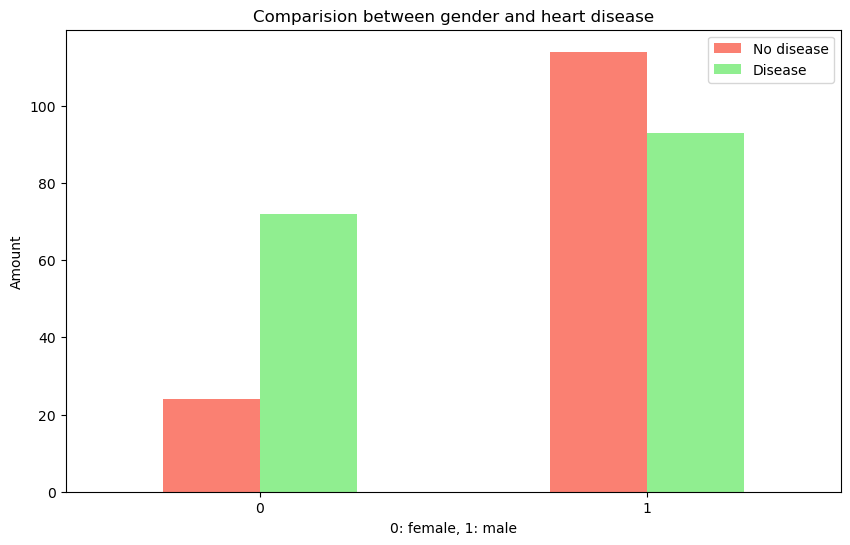

In [11]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightgreen']);
plt.title('Comparision between gender and heart disease')
plt.xlabel('0: female, 1: male')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease']);
plt.xticks(rotation=0);

Now comparing age with cholestrol

In [12]:
# fig, ax = plt.subplots(figsize=(10,10))

# ax.scatter(x=df['target'], y=df['chol']);

In [13]:
import seaborn as sns

In [14]:
# sns.catplot(x=df['target'],data=pd.crosstab(df['target'],df['chol']),kind='count');

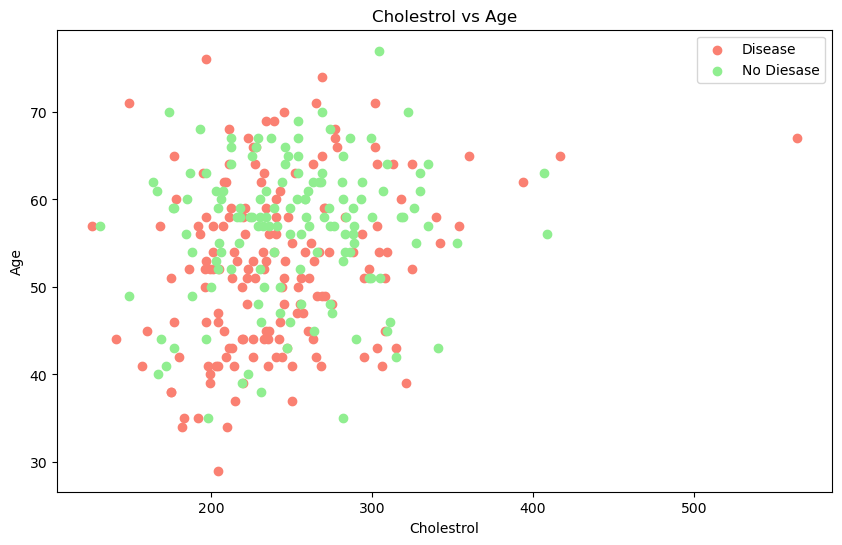

In [15]:
# pd.crosstab(df['chol'], df['target']).plot(kind='bar', figsize=(200,6));
# plt.title('Comparision between cholestrol and heart disease');
# plt.xlabel('Cholestrol')
# plt.ylabel('Amount of people')
# plt.legend(['No heart disease', 'heart disease']);
# plt.xticks(rotation=0);

fig, ax= plt.subplots(figsize=(10,6))
ax.scatter(df['chol'][df['target']==1], df['age'][df['target']==1],c='salmon');
ax.scatter(df['chol'][df['target']==0], df['age'][df['target']==0], c='lightgreen');
ax.set_title('Cholestrol vs Age');
ax.set(xlabel='Cholestrol', ylabel='Age');
ax.legend(['Disease', 'No Diesase']);

# can zoom by double click

### Plotting age vs max heart rate

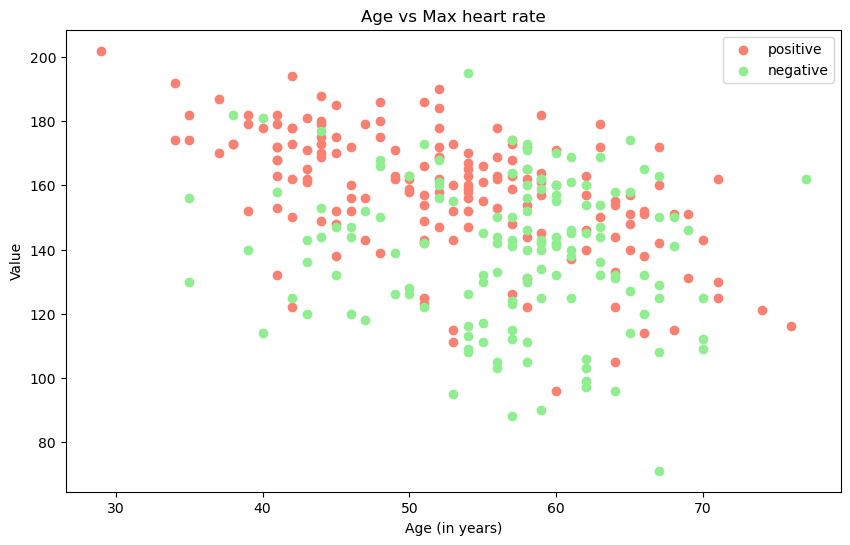

In [16]:
fig, ax= plt.subplots(figsize=(10,6))
ax.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1],c='salmon');
ax.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0], c='lightgreen');
ax.set(xlabel='Age (in years)', ylabel='Value');
ax.set_title('Age vs Max heart rate');
ax.legend(['positive', 'negative']);

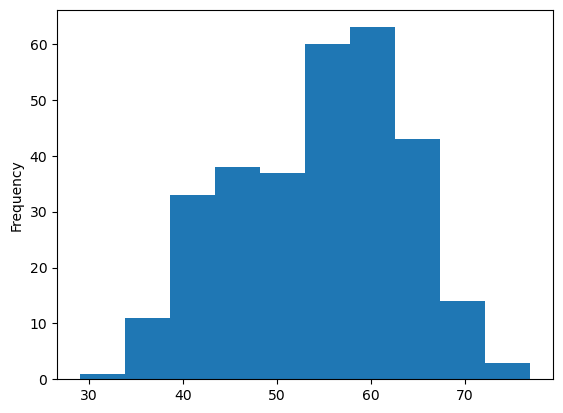

In [17]:
df['age'].plot.hist();

### heart disease vs chest paint type

In [18]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


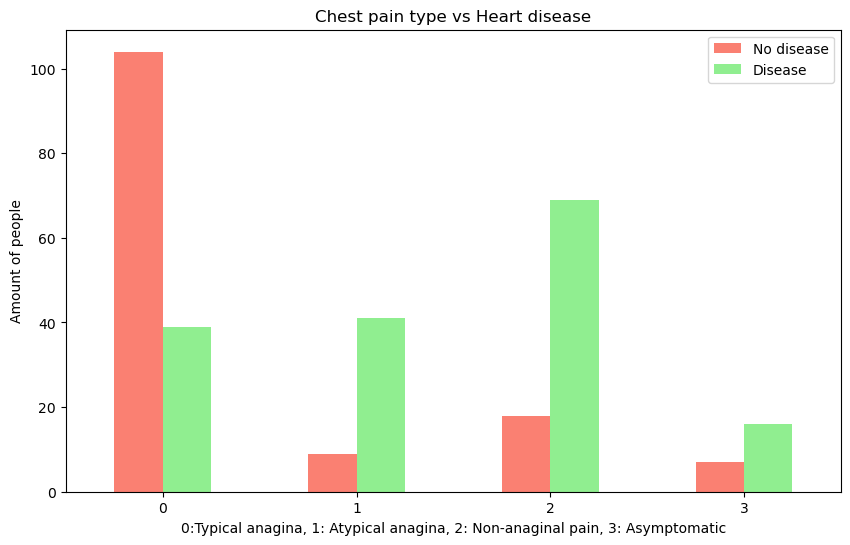

In [19]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightgreen'])
plt.xlabel('0:Typical anagina, 1: Atypical anagina, 2: Non-anaginal pain, 3: Asymptomatic');
plt.ylabel('Amount of people');
plt.legend(['No disease', 'Disease']);
plt.title('Chest pain type vs Heart disease');
plt.xticks(rotation=0);

### Correlation matrix

In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


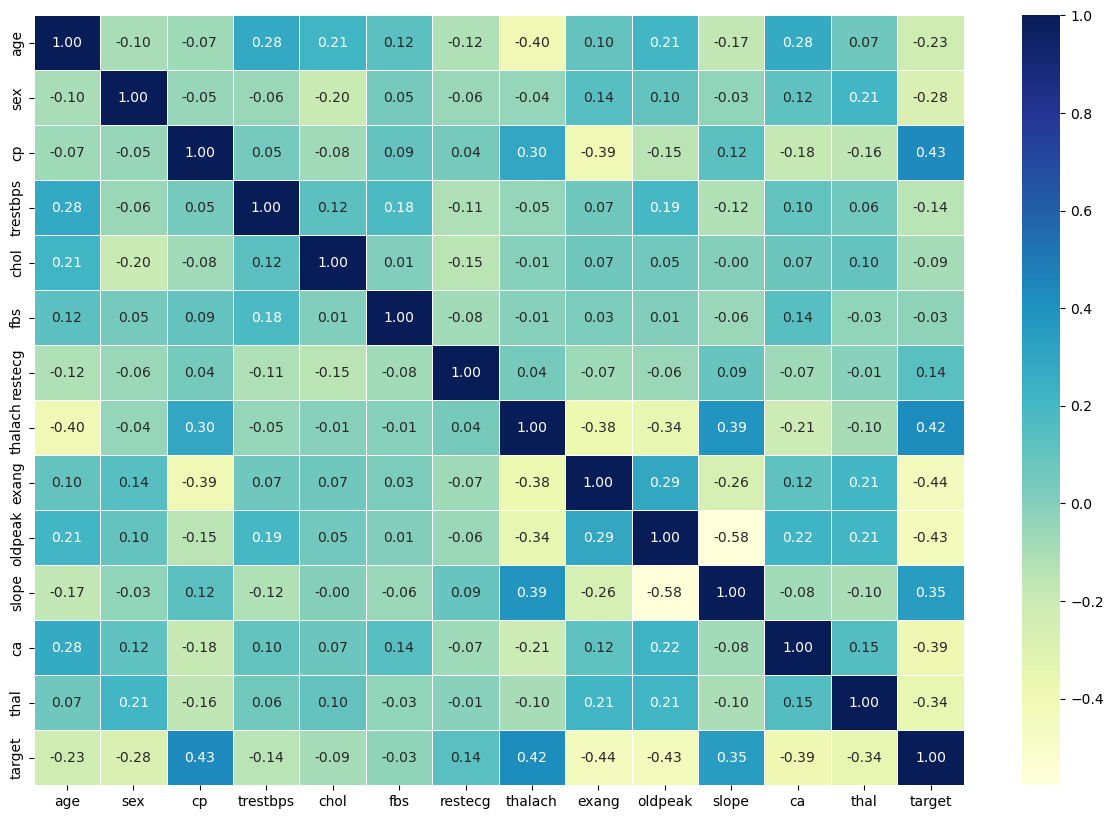

In [21]:
fig, ax= plt.subplots(figsize=(15,10))
ax= sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

## Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# df=df.sample(frac=1)
# df.head()

In [24]:
X = df.drop('target', axis=1)
y= df['target']

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [26]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [27]:
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [30]:
models={
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_train(models, X_train, X_test, y_train, y_test):
    """
    Input the model and it will train it.
    models: a dictionary of models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_training: training data (labels)
    y_test: testing data (labels)
    """
    np.random.seed(42)
    model_scores={}
    
    for name, model in models.items():
        print('Training on ', name,"...")
        model.fit(X_train, y_train)
        print("Testing model...")
        model_scores[name]=model.score(X_test,y_test)
        print("-------------------------------------")
    
    return model_scores

In [31]:
model_scores=fit_and_train(models, X_train, X_test, y_train, y_test)
model_scores

Training on  Logistic Regression ...
Testing model...
-------------------------------------
Training on  KNN ...
Testing model...
-------------------------------------
Training on  Random Forest ...
Testing model...
-------------------------------------


D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision

In [32]:
model_compare= pd.DataFrame(model_scores, index=['Accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.885246,0.688525,0.836066


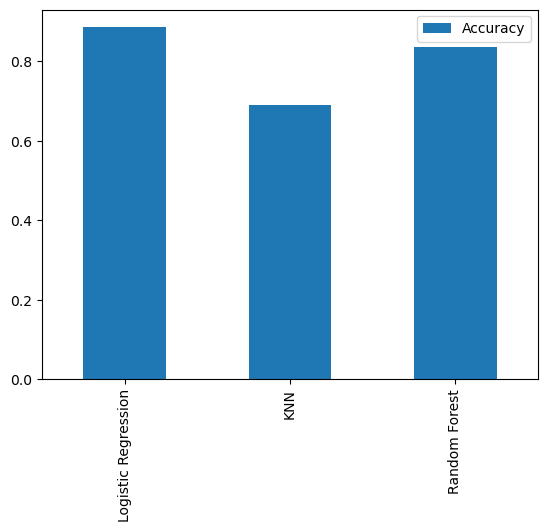

In [33]:
model_compare.T.plot.bar();

To do:

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross- validation
* Precision
* Recall
* F1
* Classification report
* ROC curve
* AUC 

## Hyperparameter Tuning

In [34]:
train_scores=[]
test_scores=[]

neighbours= range(1,21)
knn= KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max score on test data: 75.41%


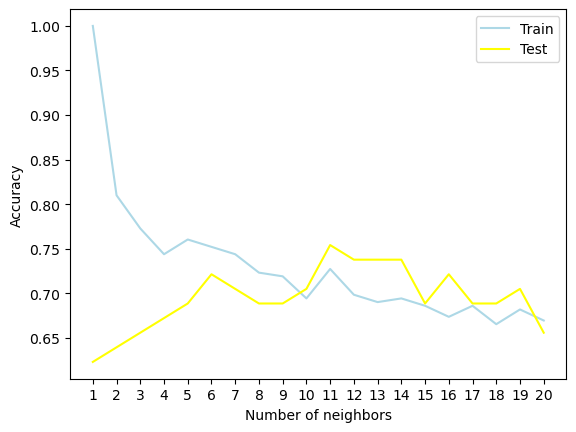

In [37]:
plt.plot(neighbours, train_scores, label='Train Score',c='lightblue')
plt.plot(neighbours, test_scores, label='Test Score', c='yellow')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend(['Train','Test']);

print(f"Max score on test data: {np.max(test_scores)*100:.2f}%")

## Randomized search CV

In [39]:
log_reg_grid={
    "penalty": [None, 'l2','l1','elasticnet'],
    "C": np.logspace(-4,4,30),
    "solver":['liblinear','saga','sag']
}

rand_for_grid={
    "n_estimators":np.arange(10,300,100),
    "max_depth":[None, 3],
    "min_samples_split":np.arange(8,16,2),
    "min_samples_leaf": np.arange(4,12,2)
}

In [39]:
np.random.seed(42)
rs_log= RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,refit=True, cv=5,verbose=True,n_iter=240)
rs_log.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\sit

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\sit

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\s

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\sit

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\s

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\s

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\s

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\sit

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\sit

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=240,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'penalty': [None, 'l2', 'l1',
                                                    'elasticnet'],
                                        'solver': ['liblinear', 'saga', 'sag']},
                   verbose=True)

In [40]:
rs_log.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.20433597178569418}

In [41]:
rs_log.score(X_test, y_test)

0.8852459016393442

In [42]:
np.random.seed(42)
rs_rand_for= RandomizedSearchCV(RandomForestClassifier(), param_distributions=rand_for_grid, refit=True, verbose=True, cv=5, n_iter=20)
rs_rand_for.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3],
                                        'min_samples_leaf': array([ 4,  6,  8, 10]),
                                        'min_samples_split': array([ 8, 10, 12, 14]),
                                        'n_estimators': array([ 10, 110, 210])},
                   verbose=True)

In [43]:
rs_rand_for.best_params_

{'n_estimators': 110,
 'min_samples_split': 8,
 'min_samples_leaf': 10,
 'max_depth': 3}

In [44]:
rs_rand_for.score(X_test, y_test)

0.8688524590163934

### Grid search CV

In [40]:
gr_log_leg= GridSearchCV(estimator=LogisticRegression(), param_grid=log_reg_grid,cv=5, refit=True, verbose=True )
gr_log_leg.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-pa

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-pa

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-pa

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\sit

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-pa

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\s

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\s

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-pa

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AI-ML\Projects\sample_project_1\env\L

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['liblinear', 'saga', 'sag']},
             verbose=True)

In [41]:
gr_log_leg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [42]:
gr_log_leg.score(X_test, y_test)

0.8852459016393442

In [43]:
gr_rand_for= GridSearchCV(estimator=RandomForestClassifier(), param_grid=rand_for_grid, cv=5, refit=True, verbose=True)
gr_rand_for.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3],
                         'min_samples_leaf': array([ 4,  6,  8, 10]),
                         'min_samples_split': array([ 8, 10, 12, 14]),
                         'n_estimators': array([ 10, 110, 210])},
             verbose=True)

In [44]:
gr_rand_for.best_params_

{'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 14,
 'n_estimators': 10}

In [45]:
# Random forest
gr_rand_for.score(X_test, y_test)

0.8688524590163934

In [46]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [47]:
y_preds= gr_log_leg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

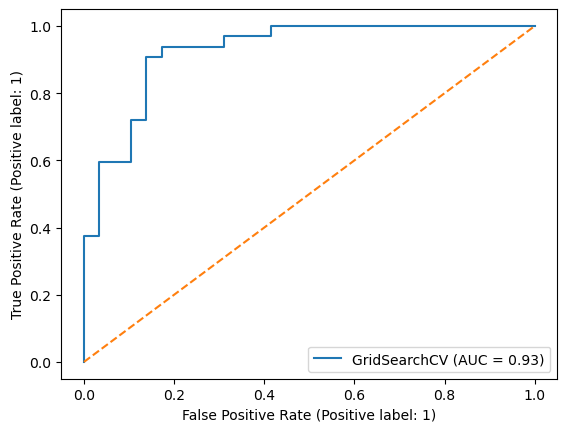

In [49]:
# ROC curve
RocCurveDisplay.from_estimator(gr_log_leg, X_test, y_test)
plt.plot([0,1],[0,1], linestyle="--");
# plt.Line2D([0,1], [0,1], linestyle="--")

In [50]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


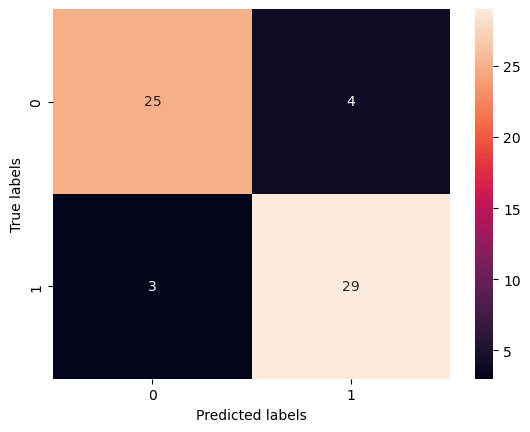

In [51]:
def plot_conf_mat(y_true, y_preds):
    """
    Plots the confusion matrix
    y_true: true labels
    y_preds: predicted labels
    """
    mat= confusion_matrix(y_true, y_preds)
    sns.heatmap(mat, annot=True)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    
plot_conf_mat(y_test, y_preds)

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [53]:
gr_log_leg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [54]:
model= LogisticRegression(C= 0.20433597178569418, penalty= 'l2', solver= 'liblinear')

In [55]:
# cross-val accuracy
cv_acc=cross_val_score(model,X, y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [56]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [57]:
# cross-val recall
cv_rec=cross_val_score(model,X, y,cv=5,scoring='recall')
cv_rec= np.mean(cv_rec)
cv_rec

0.9212121212121213

In [58]:
# cross-val precision
cv_pre=cross_val_score(model,X, y,cv=5,scoring='precision')
cv_pre= np.mean(cv_pre)
cv_pre

0.8207936507936507

In [59]:
# cross-val f1-score
cv_f1=cross_val_score(model,X, y,cv=5,scoring='f1')
cv_f1= np.mean(cv_f1)
cv_f1

0.8673007976269721

In [60]:
score_df= pd.DataFrame({"Accuracy":cv_acc,
                        "Recall": cv_rec,
                        "Precision": cv_pre,
                        "F1": cv_f1}, index=[0])
score_df

,Accuracy,Recall,Precision,F1
0,0.844699,0.921212,0.820794,0.867301


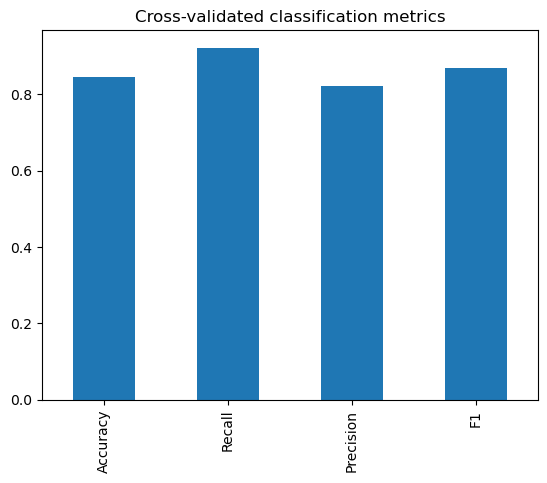

In [61]:
score_df.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature importance

weight of features to outcome

In [62]:
model

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [63]:
model= LogisticRegression(C=0.20433597178569418, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [64]:
model.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [65]:
feature_dict=dict(zip(df.columns, model.coef_[0]))

In [66]:
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [67]:
plt.style.use("ggplot")

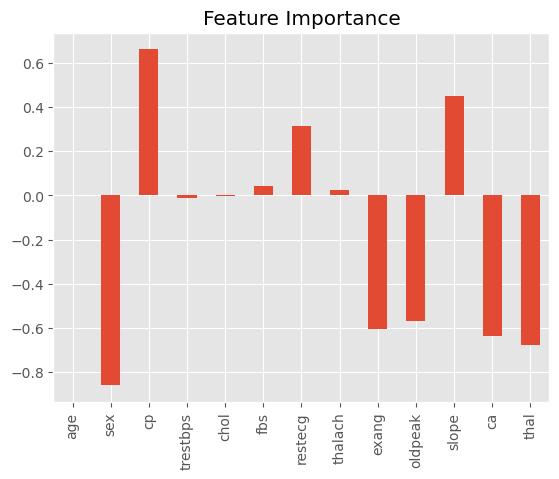

In [68]:
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [69]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [70]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [71]:
import joblib
joblib.dump(model,"Models/logistic_regression.joblib")

['Models/logistic_regression.joblib']

In [72]:
import joblib
model= joblib.load("Models/logistic_regression.joblib")

## 6. Experimentation

If haven't reached the target (here 95% accuracy), then:
* Can collect more data?
* Can use a better model? CatBoost, XGBoost?
* Improve the current model further?

If success:
* Export and share model

In [73]:
# trying Decisoin tree
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7540983606557377

In [74]:
# support vector
np.random.seed(42)
from sklearn.svm import SVC
model= SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7049180327868853

In [75]:
# naive bayes
np.random.seed(42)
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8688524590163934

In [76]:
NB_Grid={
    "var_smoothing": np.logspace(-10,10,100)
}

In [77]:
np.random.seed(42)
gs_NB= GridSearchCV(GaussianNB(), param_grid=NB_Grid,cv=5,refit=True, verbose=True)
gs_NB.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32...
       2.25701972e+05, 3.59381366e+05, 5.72236766e+05, 9.11162756e+05,
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10])},
             verbose=True)

In [78]:
gs_NB.best_params_

{'var_smoothing': 1.7886495290574353e-05}

In [79]:
gs_NB.score(X_test, y_test)

0.8688524590163934

In [80]:
## can't obtain more than 89% (Logistic regression)

In [83]:
from catboost import CatBoostClassifier

In [81]:
np.random.seed(42)
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7704918032786885

In [87]:
model= CatBoostClassifier();
model.fit(X_train, y_train);
model.score(X_test, y_test)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 4.27ms	remaining: 4.27s
1:	learn: 0.6846994	total: 7.78ms	remaining: 3.88s
2:	learn: 0.6804470	total: 11.3ms	remaining: 3.74s
3:	learn: 0.6762242	total: 15.5ms	remaining: 3.85s
4:	learn: 0.6716784	total: 19.1ms	remaining: 3.8s
5:	learn: 0.6672808	total: 22.5ms	remaining: 3.73s
6:	learn: 0.6639958	total: 26.2ms	remaining: 3.71s
7:	learn: 0.6601980	total: 29.7ms	remaining: 3.69s
8:	learn: 0.6563766	total: 33.2ms	remaining: 3.66s
9:	learn: 0.6525103	total: 36.6ms	remaining: 3.63s
10:	learn: 0.6483670	total: 39.4ms	remaining: 3.54s
11:	learn: 0.6448827	total: 42.7ms	remaining: 3.52s
12:	learn: 0.6412767	total: 46ms	remaining: 3.49s
13:	learn: 0.6374286	total: 49.3ms	remaining: 3.47s
14:	learn: 0.6335427	total: 52.6ms	remaining: 3.45s
15:	learn: 0.6288052	total: 55.9ms	remaining: 3.44s
16:	learn: 0.6250489	total: 59.4ms	remaining: 3.44s
17:	learn: 0.6209495	total: 63ms	remaining: 3.44s
18:	learn: 0.6181899	total: 66.3ms	remaining: 3.4

181:	learn: 0.3388977	total: 389ms	remaining: 1.75s
182:	learn: 0.3379224	total: 391ms	remaining: 1.74s
183:	learn: 0.3371813	total: 393ms	remaining: 1.74s
184:	learn: 0.3368890	total: 394ms	remaining: 1.74s
185:	learn: 0.3357595	total: 396ms	remaining: 1.73s
186:	learn: 0.3350316	total: 398ms	remaining: 1.73s
187:	learn: 0.3339623	total: 399ms	remaining: 1.73s
188:	learn: 0.3333955	total: 401ms	remaining: 1.72s
189:	learn: 0.3321844	total: 403ms	remaining: 1.72s
190:	learn: 0.3318179	total: 405ms	remaining: 1.71s
191:	learn: 0.3310974	total: 407ms	remaining: 1.71s
192:	learn: 0.3300926	total: 409ms	remaining: 1.71s
193:	learn: 0.3293827	total: 411ms	remaining: 1.71s
194:	learn: 0.3287322	total: 412ms	remaining: 1.7s
195:	learn: 0.3276139	total: 414ms	remaining: 1.7s
196:	learn: 0.3268063	total: 416ms	remaining: 1.7s
197:	learn: 0.3259827	total: 418ms	remaining: 1.69s
198:	learn: 0.3250021	total: 420ms	remaining: 1.69s
199:	learn: 0.3246581	total: 422ms	remaining: 1.69s
200:	learn: 0.3

375:	learn: 0.2309665	total: 765ms	remaining: 1.27s
376:	learn: 0.2305487	total: 768ms	remaining: 1.27s
377:	learn: 0.2302362	total: 770ms	remaining: 1.27s
378:	learn: 0.2298494	total: 772ms	remaining: 1.26s
379:	learn: 0.2294705	total: 774ms	remaining: 1.26s
380:	learn: 0.2289192	total: 776ms	remaining: 1.26s
381:	learn: 0.2284711	total: 779ms	remaining: 1.26s
382:	learn: 0.2282753	total: 781ms	remaining: 1.26s
383:	learn: 0.2280230	total: 783ms	remaining: 1.25s
384:	learn: 0.2278448	total: 785ms	remaining: 1.25s
385:	learn: 0.2276390	total: 787ms	remaining: 1.25s
386:	learn: 0.2272838	total: 789ms	remaining: 1.25s
387:	learn: 0.2269429	total: 791ms	remaining: 1.25s
388:	learn: 0.2264794	total: 794ms	remaining: 1.25s
389:	learn: 0.2260882	total: 796ms	remaining: 1.25s
390:	learn: 0.2257320	total: 798ms	remaining: 1.24s
391:	learn: 0.2253825	total: 801ms	remaining: 1.24s
392:	learn: 0.2250201	total: 803ms	remaining: 1.24s
393:	learn: 0.2247848	total: 805ms	remaining: 1.24s
394:	learn: 

569:	learn: 0.1760322	total: 1.14s	remaining: 861ms
570:	learn: 0.1757642	total: 1.14s	remaining: 859ms
571:	learn: 0.1754087	total: 1.15s	remaining: 857ms
572:	learn: 0.1751396	total: 1.15s	remaining: 855ms
573:	learn: 0.1749395	total: 1.15s	remaining: 853ms
574:	learn: 0.1747539	total: 1.15s	remaining: 851ms
575:	learn: 0.1745199	total: 1.15s	remaining: 848ms
576:	learn: 0.1742043	total: 1.15s	remaining: 846ms
577:	learn: 0.1738340	total: 1.16s	remaining: 844ms
578:	learn: 0.1736564	total: 1.16s	remaining: 842ms
579:	learn: 0.1734342	total: 1.16s	remaining: 840ms
580:	learn: 0.1730258	total: 1.16s	remaining: 838ms
581:	learn: 0.1727580	total: 1.16s	remaining: 836ms
582:	learn: 0.1725132	total: 1.17s	remaining: 835ms
583:	learn: 0.1723444	total: 1.17s	remaining: 833ms
584:	learn: 0.1721916	total: 1.17s	remaining: 831ms
585:	learn: 0.1720102	total: 1.17s	remaining: 829ms
586:	learn: 0.1716866	total: 1.17s	remaining: 827ms
587:	learn: 0.1715266	total: 1.18s	remaining: 824ms
588:	learn: 

769:	learn: 0.1374952	total: 1.52s	remaining: 454ms
770:	learn: 0.1372894	total: 1.52s	remaining: 452ms
771:	learn: 0.1370975	total: 1.52s	remaining: 450ms
772:	learn: 0.1369155	total: 1.53s	remaining: 448ms
773:	learn: 0.1366199	total: 1.53s	remaining: 446ms
774:	learn: 0.1364509	total: 1.53s	remaining: 445ms
775:	learn: 0.1362974	total: 1.53s	remaining: 443ms
776:	learn: 0.1362117	total: 1.53s	remaining: 441ms
777:	learn: 0.1361791	total: 1.54s	remaining: 439ms
778:	learn: 0.1359627	total: 1.54s	remaining: 437ms
779:	learn: 0.1357030	total: 1.54s	remaining: 435ms
780:	learn: 0.1355830	total: 1.54s	remaining: 433ms
781:	learn: 0.1354795	total: 1.54s	remaining: 431ms
782:	learn: 0.1353910	total: 1.55s	remaining: 429ms
783:	learn: 0.1351965	total: 1.55s	remaining: 427ms
784:	learn: 0.1350559	total: 1.55s	remaining: 425ms
785:	learn: 0.1349489	total: 1.55s	remaining: 423ms
786:	learn: 0.1349225	total: 1.56s	remaining: 421ms
787:	learn: 0.1346507	total: 1.56s	remaining: 419ms
788:	learn: 

933:	learn: 0.1124583	total: 1.86s	remaining: 131ms
934:	learn: 0.1124221	total: 1.86s	remaining: 130ms
935:	learn: 0.1122122	total: 1.87s	remaining: 128ms
936:	learn: 0.1121434	total: 1.88s	remaining: 126ms
937:	learn: 0.1120469	total: 1.89s	remaining: 125ms
938:	learn: 0.1119567	total: 1.9s	remaining: 123ms
939:	learn: 0.1118173	total: 1.91s	remaining: 122ms
940:	learn: 0.1116181	total: 1.92s	remaining: 120ms
941:	learn: 0.1115276	total: 1.92s	remaining: 118ms
942:	learn: 0.1113526	total: 1.93s	remaining: 117ms
943:	learn: 0.1111999	total: 1.94s	remaining: 115ms
944:	learn: 0.1110753	total: 1.95s	remaining: 113ms
945:	learn: 0.1109783	total: 1.96s	remaining: 112ms
946:	learn: 0.1107847	total: 1.96s	remaining: 110ms
947:	learn: 0.1106468	total: 1.97s	remaining: 108ms
948:	learn: 0.1105324	total: 1.97s	remaining: 106ms
949:	learn: 0.1104533	total: 1.98s	remaining: 104ms
950:	learn: 0.1103040	total: 1.98s	remaining: 102ms
951:	learn: 0.1101347	total: 1.98s	remaining: 99.9ms
952:	learn: 

0.8360655737704918

In [109]:
print("Enter the patient's information:")
a1= input("Age:")
a2=input("Sex:")
a3=input("cp:")
a4=input("trestbps:")
a5=input("cholestrol:")
a6=input("fbs:")
a7=input("restecg:")
a8=input("thalach:")
a9=input("exang:")
a10=input("oldpeak:")
a11=input("slope:")
a12=input("ca:")
a13=input("thal:")



Enter the patient's information:
Age:35
Sex:0
cp:2
trestbps:150
cholestrol:200
fbs:1
restecg:0
thalach:135
exang:0
oldpeak:0
slope:1
ca:0
thal:2


In [110]:
input_array= np.array([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13])
input_array=input_array.astype(int)

In [101]:
# model= joblib.load("Models/logistic_regression.joblib")

In [111]:
result=model.predict(input_array.reshape(1,-1))

D:\AI-ML\Projects\sample_project_1\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [112]:
if result[0]==0:
    print("The patient does not suffer from heart disease")
else:
    print("The patient suffer from heart disease")

The patient suffer from heart disease
